In [5]:
import pandas as pd

# Load the dataset from a CSV file
stock_df = pd.read_csv('D:/Master Degree at NYCU/1. Slides and Homeworks/Spring_2024/1. FinTech/JN/Stocks_ClosePrice.csv')

# Display the first few rows of the dataset
print(stock_df.head())

        Date          FB         GOOG        NFLX         AMZN        AAPL  \
0  2018/9/24  165.410004  1173.369995  369.609985  1934.359985  220.789993   
1  2018/9/25  164.910004  1184.650024  369.429993  1974.550049  222.190002   
2  2018/9/26  166.949997  1180.489990  377.880005  1974.849976  220.419998   
3  2018/9/27  168.839996  1194.640015  380.709991  2012.979980  224.949997   
4  2018/9/28  164.460007  1193.469971  374.130005  2003.000000  225.740005   

       FB.1    GOOG.1    NFLX.1    AMZN.1    AAPL.1  
0       NaN       NaN       NaN       NaN       NaN  
1 -0.003027  0.009567 -0.000487  0.020564  0.006321  
2  0.012294 -0.003518  0.022615  0.000152 -0.007998  
3  0.011257  0.011915  0.007461  0.019124  0.020343  
4 -0.026284 -0.000980 -0.017435 -0.004970  0.003506  


In [25]:
# Specify the columns for which you want to calculate mean and std
specific_columns = ['FB.1', 'GOOG.1', 'NFLX.1', 'AMZN.1','AAPL.1']  # Change these to your actual column names

# Check if the specified columns are in the DataFrame
columns_to_calculate = [col for col in specific_columns if col in stock_df.columns]

if columns_to_calculate:
    # Calculate mean and standard deviation for the specified columns
    mean_returns = stock_df[columns_to_calculate].mean()
    std_returns = stock_df[columns_to_calculate].std()

    # Display the results
    print("Mean Returns of the Selected Stocks:")
    print(mean_returns)
    print("\nStandard Deviation of Returns of the Selected Stocks:")
    print(std_returns)

Mean Returns of the Selected Stocks:
FB.1      0.000555
GOOG.1    0.000189
NFLX.1   -0.001250
AMZN.1   -0.000302
AAPL.1   -0.000056
dtype: float64

Standard Deviation of Returns of the Selected Stocks:
FB.1      0.020943
GOOG.1    0.018474
NFLX.1    0.027119
AMZN.1    0.022313
AAPL.1    0.020421
dtype: float64


C:\Users\PINYKEWD\AppData\Local\Temp\ipykernel_27508\1136414866.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(stock, (mean_returns[i], std_returns[i]), textcoords="offset points", xytext=(0,10), ha='center')


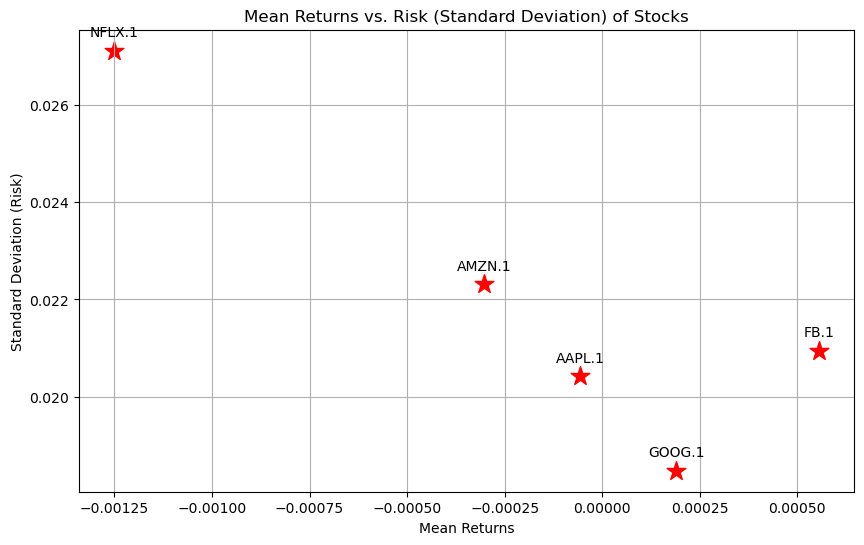

In [27]:
import matplotlib.pyplot as plt

# Calculate the mean returns and standard deviations
mean_returns = stock_df[specific_columns].mean()
std_returns = stock_df[specific_columns].std()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mean_returns, std_returns, color='red', marker='*', s=200)  # s is the size of the stars

# Label the points with stock names
for i, stock in enumerate(specific_columns):
    plt.annotate(stock, (mean_returns[i], std_returns[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Set titles and labels
plt.title('Mean Returns vs. Risk (Standard Deviation) of Stocks')
plt.xlabel('Mean Returns')
plt.ylabel('Standard Deviation (Risk)')
plt.grid()

# Show the plot
plt.show()

In [29]:
import numpy as np

# Calculate mean returns for the specified stocks
mean_returns = stock_df[specific_columns].mean()

# Generate random weights
weights = np.random.rand(len(specific_columns))
weights /= weights.sum()  # Normalize weights to sum to 1

# Calculate the portfolio mean and standard deviation
portfolio_mean = np.dot(weights, mean_returns)  # Weighted mean
portfolio_variance = np.dot(weights.T, np.dot(stock_df[specific_columns].cov(), weights))  # Portfolio variance
portfolio_std = np.sqrt(portfolio_variance)  # Portfolio standard deviation

# Print the results
print("Random Weights:", weights)
print("Mean of the Portfolio:", portfolio_mean)
print("Standard Deviation of the Portfolio:", portfolio_std)

Random Weights: [0.26750659 0.08084003 0.33571053 0.22600482 0.08993802]
Mean of the Portfolio: -0.000329187642743417
Standard Deviation of the Portfolio: 0.019712988746467597


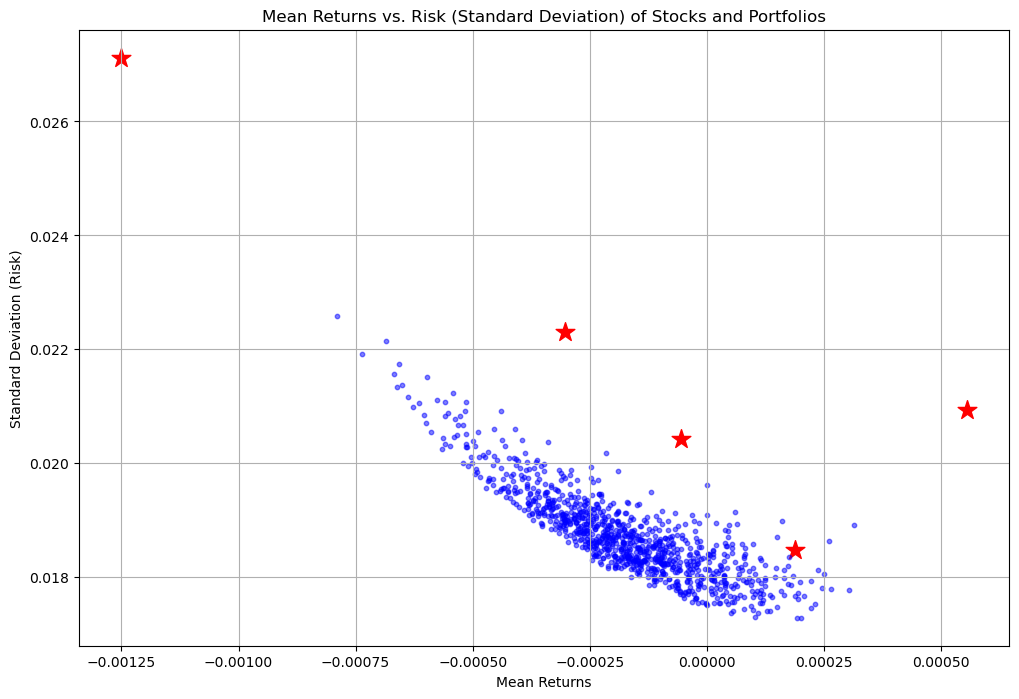

In [31]:
# Create a scatter plot for original stocks
plt.figure(figsize=(12, 8))
plt.scatter(mean_returns, std_returns, color='red', marker='*', s=200)  # Original stocks

# Generate 1000 random portfolios
n_portfolios = 1000
portfolio_means = []
portfolio_stds = []

for _ in range(n_portfolios):
    # Generate random weights
    weights = np.random.rand(len(specific_columns))
    weights /= weights.sum()  # Normalize weights to sum to 1
    
    # Calculate portfolio mean and standard deviation
    portfolio_mean = np.dot(weights, mean_returns)
    portfolio_variance = np.dot(weights.T, np.dot(stock_df[specific_columns].cov(), weights))
    portfolio_std = np.sqrt(portfolio_variance)
    
    portfolio_means.append(portfolio_mean)
    portfolio_stds.append(portfolio_std)

# Convert lists to numpy arrays for plotting
portfolio_means = np.array(portfolio_means)
portfolio_stds = np.array(portfolio_stds)

# Plot the artificial portfolios
plt.scatter(portfolio_means, portfolio_stds, color='blue', alpha=0.5, s=10)  # Artificial portfolios

# Set titles and labels
plt.title('Mean Returns vs. Risk (Standard Deviation) of Stocks and Portfolios')
plt.xlabel('Mean Returns')
plt.ylabel('Standard Deviation (Risk)')
plt.grid()

# Show the plot
plt.show()

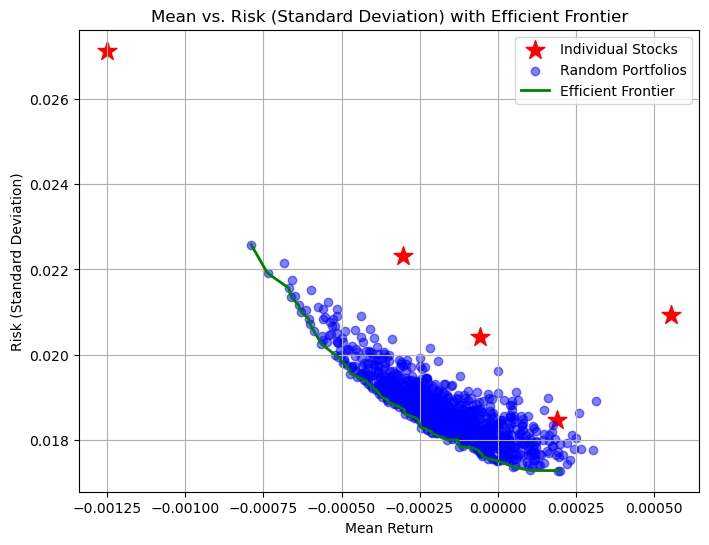

In [47]:
# Convert lists to arrays for easier processing
portfolio_means = np.array(portfolio_means)
portfolio_stds = np.array(portfolio_stds)

# Sort portfolios by mean return and find the minimum std for each unique mean return
sorted_indices = np.argsort(portfolio_means)
sorted_means = portfolio_means[sorted_indices]
sorted_stds = portfolio_stds[sorted_indices]

# Calculate the efficiency frontier by filtering portfolios with minimum std for a given mean return
efficient_frontier_means = []
efficient_frontier_stds = []

for i in range(len(sorted_means)):
    if i == 0 or sorted_stds[i] < min(efficient_frontier_stds):
        efficient_frontier_means.append(sorted_means[i])
        efficient_frontier_stds.append(sorted_stds[i])

# Plot the efficient frontier
plt.figure(figsize=(8, 6))
plt.scatter(mean_returns, std_returns, color='red', marker='*', s=200, label='Individual Stocks')
plt.scatter(portfolio_means, portfolio_stds, color='blue', alpha=0.5, label='Random Portfolios')
plt.plot(efficient_frontier_means, efficient_frontier_stds, color='green', linewidth=2, label='Efficient Frontier')

# Add labels and title
plt.title('Mean vs. Risk (Standard Deviation) with Efficient Frontier')
plt.xlabel('Mean Return')
plt.ylabel('Risk (Standard Deviation)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
Yes